<strong>Prendre le fichier geoJSON et en faire un dataframe avec une colonne correspondant au nom du centre de réanimation, une colonne latitude et une colonne longitude et chaque ligne est un point

In [18]:
import geopandas as gpd

gdf = gpd.read_file("../data/reanimation.geojson")
gdf['latitude'] = gdf['geometry'].y
gdf['longitude'] = gdf['geometry'].x
gdf['name'] = gdf['name']

df = gdf[["name","latitude","longitude"]]

df.to_csv("points.csv",index=False, encoding="utf-8")

<strong>Algorithme des K-means avec modification du CSV points.csv en ajoutant une colonne avec le numéro du cluster associé au point</strong>

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Générer des données aléatoires
X = np.array(df[["latitude", "longitude"]])

# Initialiser l'algorithme des K-means
best_k = 1
best_preds = None
best_centroids = None
best_score = -1
for k in range(2, 11):
    # Exécuter l'algorithme sur les données avec k clusters
    kmeans = KMeans(n_clusters=k, n_init=10).fit(X)

    # Prédire le cluster associé à chaque point
    preds = kmeans.predict(X)

    # Obtenir les centroïdes des clusters
    centroids = kmeans.cluster_centers_

    # Calculer le coefficient de silhouette pour chaque itération
    score = silhouette_score(X, preds)
    print("For k = {}, silhouette score is {}".format(k, score))

    if score > best_score:
        best_k = k
        best_preds = preds
        best_centroids = centroids
        best_score = score

print("\nBest silhouette score is {} with {} clusters".format(best_score, best_k))

# Afficher les labels prédits pour chaque point
df["cluster"] = best_preds
df.to_csv("points.csv", index=False, encoding="utf-8")


For k = 2, silhouette score is 0.4641878395867699
For k = 3, silhouette score is 0.5111869379736562
For k = 4, silhouette score is 0.5118014652078529
For k = 5, silhouette score is 0.5370002472819351
For k = 6, silhouette score is 0.537870295352183
For k = 7, silhouette score is 0.538417659786902
For k = 8, silhouette score is 0.4869222290992349
For k = 9, silhouette score is 0.5032759366297881
For k = 10, silhouette score is 0.5301074396021563

Best silhouette score is 0.538417659786902 with 7 clusters


/var/folders/1q/ds13mxv91mgf0b9tt_mwyb4r0000gn/T/ipykernel_90920/2951680727.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster"] = best_preds


<strong>Affichage des clusters et de leur centroïde avec Matplotlib

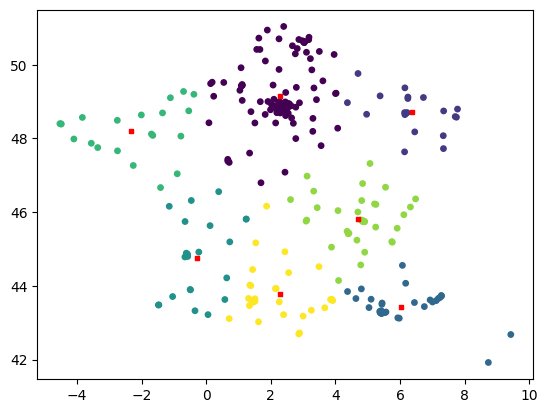

In [20]:
import matplotlib.pyplot as plt

# Affichage des clusters
plt.scatter(X[:,1], X[:,0], s = 15, c = best_preds)
plt.scatter(best_centroids[:, 1], best_centroids[:, 0], s = 10, c = 'r', marker='s')
plt.show()

<strong>Créer un dataframe avec les centroïdes et leurs clusters associés</strong>

In [21]:
import pandas as pd
centroids = best_centroids.tolist()
for i in range(len(centroids)):
    centroids[i].append(i)
    centroids[i].insert(0, "Centroïde_"+str(i))
print(centroids)

df_centroids = pd.DataFrame(centroids, columns=["name","latitude","longitude","cluster"])
df_centroids.to_csv("centroids.csv", index=False, encoding="utf-8")


[['Centroïde_0', 49.13973150076923, 2.2686152946153846, 0], ['Centroïde_1', 48.71504104, 6.366201865, 1], ['Centroïde_2', 43.43809582285714, 6.02670586, 2], ['Centroïde_3', 44.75435466, -0.28180156000000034, 3], ['Centroïde_4', 48.21084957142857, -2.3159885000000004, 4], ['Centroïde_5', 45.82381395, 4.7032069666666665, 5], ['Centroïde_6', 43.77772958333333, 2.2830795833333335, 6]]


<strong>Créer un fichier geoJSON à partir du csv créer avec les points</strong>

In [22]:
!pip3 install pandas_geojson
from pandas_geojson import to_geojson
from pandas_geojson import write_geojson

geo_json = to_geojson(df=df, lat='latitude', lon='longitude',
                 properties=['name','cluster'])
write_geojson(geo_json, filename='points.geojson', indent=4)
# pts_geojson = gpd.read_file("points.geojson")  # permet d'afficher sans problème d'encodage le fichier geoJSON


Defaulting to user installation because normal site-packages is not writeable


<strong>Ajouter les centroïdes dans le fichier geojson points.geojson et créer un dataframe avec points et centroïdes</strong>

In [23]:
df_all = df.append(df_centroids)

df_all.to_csv("points+centroides.csv", index=False, encoding="utf-8")

geo_json = to_geojson(df=df_all, lat='latitude', lon='longitude',
                 properties=['name','cluster'])
write_geojson(geo_json, filename='points+centroides.geojson', indent=4)

/var/folders/1q/ds13mxv91mgf0b9tt_mwyb4r0000gn/T/ipykernel_90920/167258032.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df.append(df_centroids)


Test algorithme EM (gaussianmixture)

[[48.97640523  2.34001572]
 [48.8978738   2.52408932]
 [48.9867558   2.20227221]
 [48.89500884  2.28486428]
 [48.78967811  2.34105985]
 [48.81440436  2.44542735]
 [48.87610377  2.3121675 ]
 [48.84438632  2.33336743]
 [48.94940791  2.27948417]
 [48.83130677  2.21459043]
 [48.54470102  2.36536186]
 [48.88644362  2.2257835 ]
 [49.02697546  2.15456343]
 [48.80457585  2.28128161]
 [48.95327792  2.44693588]
 [48.81549474  2.33781625]
 [48.71122143  2.10192035]
 [48.76520879  2.3156349 ]
 [48.92302907  2.42023798]
 [48.76126732  2.26976972]
 [48.6951447   2.15799821]
 [48.62937298  2.49507754]
 [48.74903478  2.25619257]
 [48.67472046  2.37774904]
 [48.63861022  2.27872597]
 [48.71045334  2.33869025]
 [48.74891949  2.18193678]
 [48.79718178  2.34283319]
 [48.80665172  2.33024719]
 [48.73656779  2.26372588]
 [48.73275396  2.26404468]
 [48.71868537  2.12737174]
 [48.81774261  2.25982191]
 [48.63698017  2.34627823]
 [48.70927016  2.30519454]
 [48.87290906  2.31289829]
 [48.91394007  2.17651742]
 

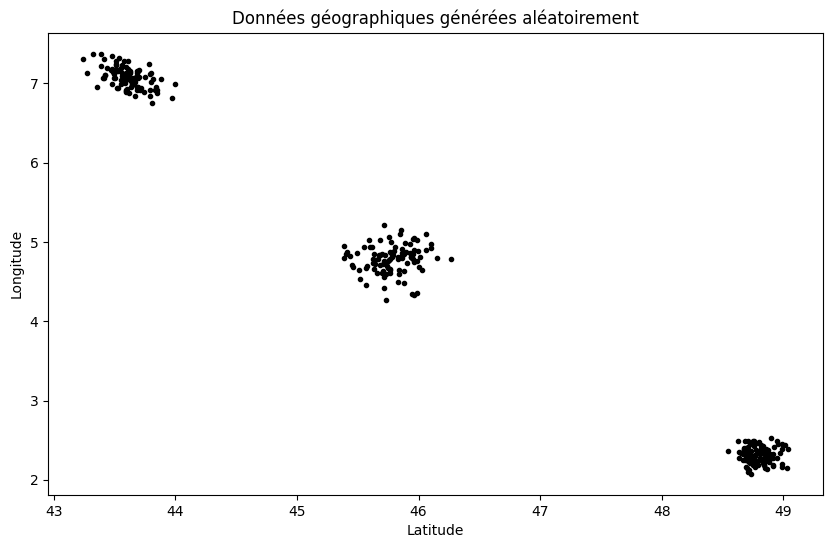

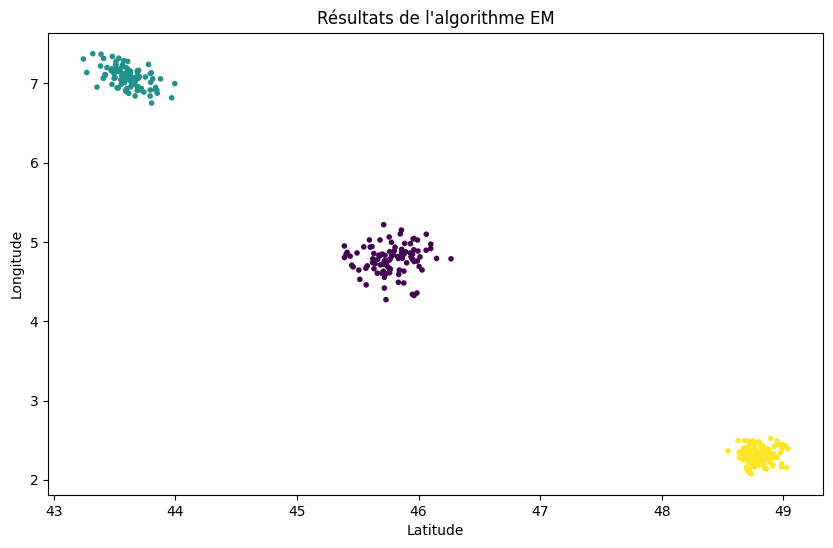

In [24]:
# Importer les bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Générer des données aléatoires à partir de trois distributions gaussiennes multivariées
np.random.seed(0) # fixer la graine aléatoire pour la reproductibilité
n_samples = 100 # nombre d'échantillons par distribution
mean1 = [48.8, 2.3] # moyenne du premier groupe (correspondant à Paris)
cov1 = [[0.01, 0], [0, 0.01]] # covariance du premier groupe
mean2 = [43.6, 7.1] # moyenne du deuxième groupe (correspondant à Nice)
cov2 = [[0.02, -0.01], [-0.01, 0.02]] # covariance du deuxième groupe
mean3 = [45.8, 4.8] # moyenne du troisième groupe (correspondant à Lyon)
cov3 = [[0.03, 0], [0, 0.03]] # covariance du troisième groupe
X1 = np.random.multivariate_normal(mean1, cov1, n_samples) # générer les échantillons du premier groupe
X2 = np.random.multivariate_normal(mean2, cov2, n_samples) # générer les échantillons du deuxième groupe
X3 = np.random.multivariate_normal(mean3, cov3, n_samples) # générer les échantillons du troisième groupe
X = np.concatenate((X1,X2,X3)) # concaténer les échantillons en une seule matrice
print(X)

# Afficher les données générées sur un graphique
plt.figure(figsize=(10,6)) # créer une figure avec une taille donnée
plt.scatter(X[:,0], X[:,1], c='black', marker='.') # tracer les points avec une couleur et un marqueur donnés
plt.xlabel('Latitude') # ajouter un label pour l'axe des x
plt.ylabel('Longitude') # ajouter un label pour l'axe des y
plt.title('Données géographiques générées aléatoirement') # ajouter un titre au graphique

# Appliquer l'algorithme EM avec le nombre de clusters fixé à 3 
gm = GaussianMixture(n_components=3) # créer un objet GaussianMixture avec le nombre de composantes fixé à 3 
gm.fit(X) # ajuster le modèle aux données 
y_pred = gm.predict(X) # prédire le cluster de chaque point

# Afficher les résultats de l'algorithme EM sur un autre graphique
plt.figure(figsize=(10,6)) # créer une autre figure avec une taille donnée
plt.scatter(X[:,0], X[:,1], c=y_pred, marker='.') # tracer les points avec une couleur correspondant au cluster prédit et un marqueur donné
plt.xlabel('Latitude') # ajouter un label pour l'axe des x
plt.ylabel('Longitude') # ajouter un label pour l'axe des y
plt.title('Résultats de l\'algorithme EM') # ajouter un titre au graphique

# Afficher les paramètres des distributions estimés par l'algorithme EM 
print('Moyennes des distributions:')
print(gm.means_)
print('Covariances des distributions:')
print(gm.covariances_)
